In [17]:
import tensorflow as tf
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

In [18]:
#Funções úteis para traçar imagens em tons de cinza e RGB:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8), interpolation="nearest")
    plt.axis("off")

# Camada convolucional

In [19]:
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[140:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

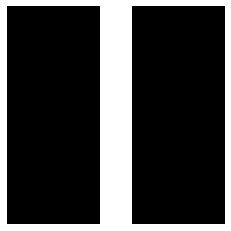

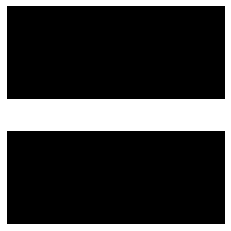

In [20]:
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
plot_image(fmap[:, :, 0, 0])
plt.show()
plot_image(fmap[:, :, 0, 1])
plt.show()

In [21]:
#Esse código aqui foi acrescentado porque o tensorflow não estava reconhecendo o atributo placeholder
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 


Instructions for updating:
non-resource variables are not supported in the long term


**Descrição**:

**X** é o minilote (mini-batch) da entrada (é um tensor 4D).
**filters** é um conjunto de filtros a aplicar (também um tensor 4D)
**strides** é uma matriz 1D de quatro elementos, onde os dois elementos centrais são os strides (passadas) verticais e horizontais (**sh** e **sw**). O primeiro e último elementos devem ser iguais a 1. Eles podem ser usados para especificar um passo em lote(para pular instâncias) e um passo de canal (para pular alguns dos mapas de recursos ou canais da camada anterior). 
**padding** (preenchimento) deve ser o **VALID** ou **SAME**:
 -Se definido como VALID (Válido), a camada convolucional não usa o preenchimento de zero e pode ignorar algumas linhas e colunas na parte inferior e direita da imagem de entrada, dependendo da passada (stride) (simplificando, apenas a dimensão horizontal é mostrada, é claro que a mesma lógica se aplica à dimensão vertical).
 -Se definido como SAME (igual), a camada convolucional usa preenchimento de zero, se necessário. Nesse caso, o número de neurônios de saída é igual ao número de neurônios de entrada dividido pelo stride (passada), arredondado para cima (neste exemplo, (13/5)=3). Em seguida, os zeros são adicionados tão uniformemente quanto possível em torno das entradas. 
 

In [22]:
X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding= "SAME")

In [23]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

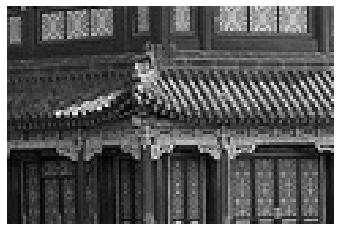

In [24]:
#Plotando a imagem original
plot_image(images[0, :, :, 0])
#save_fig("china_original", tight_layout=False)
plt.show()

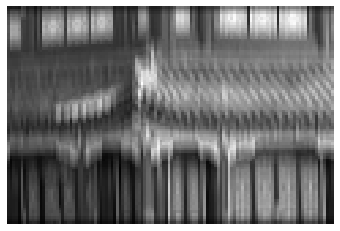

In [25]:
#Plotando a imagem com filtro vertical
plot_image(output[0, :, :, 0])
plt.show()


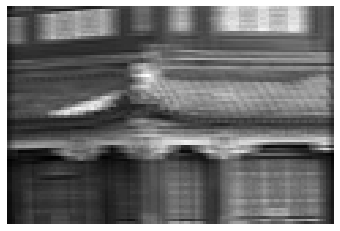

In [26]:
#Plotando a imagem com o filtro na horizontal
plot_image(output[0, :, :, 1])
plt.show()

# Simple Example

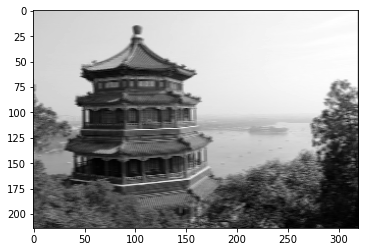

In [27]:
import numpy as np
from sklearn.datasets import load_sample_images

#Carregando as imagens de amostra
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

#Criando dois (2) filtros
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 #Linha vertical
filters[3, :, :, 1] = 1 #Linha horizontal

#Criando um gráfico com a entrada X mais uma camada convolucional aplicando os 2 filtros
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})
    
plt.imshow(output[0, :, :, 1], cmap="gray") #plotando a primeira imagem do segundo mapa de características
plt.show()

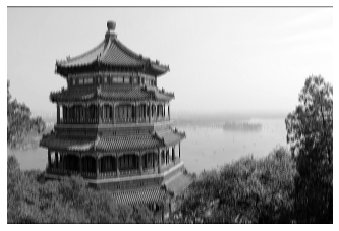

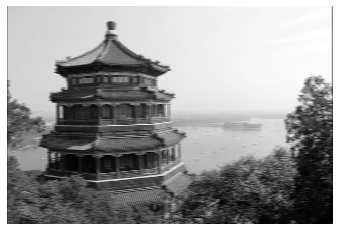

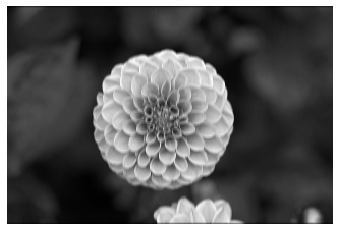

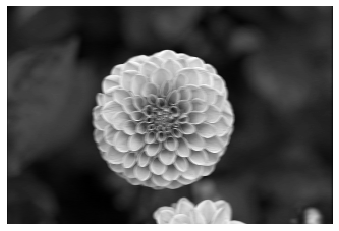

In [28]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()

In [29]:
#Usando tf.layers.conv2d():

X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2], padding="SAME")

c:\users\ssag\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\legacy_tf_layers\convolutional.py:414: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  warnings.warn('`tf.layers.conv2d` is deprecated and '
c:\users\ssag\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


In [30]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: dataset})

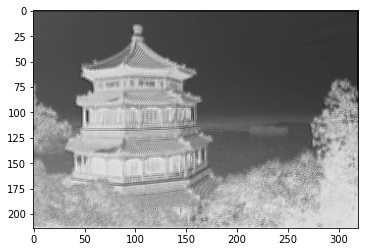

In [31]:
plt.imshow(output[0, :, :, 1], cmap="gray")#Plotando a primeira imagem do segundo mapa de características
plt.show()

# VALID vs SAME padding

In [32]:
filter_primes = np.array([2., 3., 5., 7., 11., 13.], dtype=np.float32)
x = tf.constant(np.arange(1, 13+1, dtype=np.float32).reshape([1, 1, 13, 1]))
filters = tf.constant(filter_primes.reshape(1, 6, 1, 1))

valid_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='VALID')
same_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='SAME')

with tf.Session() as sess:
    print("VALID:\n", valid_conv.eval())
    print("SAME:\n", same_conv.eval())

VALID:
 [[[[184.]
   [389.]]]]
SAME:
 [[[[143.]
   [348.]
   [204.]]]]


In [33]:
print("VALID:")
print(np.array([1,2,3,4,5,6]).T.dot(filter_primes))
print(np.array([6,7,8,9,10,11]).T.dot(filter_primes))
print("SAME:")
print(np.array([0,1,2,3,4,5]).T.dot(filter_primes))
print(np.array([5,6,7,8,9,10]).T.dot(filter_primes))
print(np.array([10,11,12,13,0,0]).T.dot(filter_primes))

VALID:
184.0
389.0
SAME:
143.0
348.0
204.0


**Obs:** é importante ressaltar que as camadas convolucionais têm alguns hiperparâmetros: você deve escolher o número de filtros, sua altura e largura, as passadas e o tipo de preenchimento. Para isso, você deve usa a **cross validation** para encontrar os valores corretos de hiperparâmetros. 

# Pooling layer

A camada pooling é o segundo bloco de construção comum das CNNs. O objetivo dessa camada é reduzir a amostra (ou seja, reduzir) a imagem de entrada para reduzir a carga computacional, o uso de memória e o número de parâmetros (limitando assim o risco de sobreajuste(overfitting)). Reduzir o tamanho da imagem de entrada também faz com que a rede neural tolere um pouco de deslocamento da imagem (invariância de localização). 
Assim como nas camadas convolucionais, cada neurônio em uma camada de pooling está conectado às saídas de um número limitado de neurônios na camada anterior, localizados dentro de um pequeno campo receptivo retangular. Você deve definir o tamanho, a passada e o tipo de preenchimento, como antes. No entanto, um neurônio de pooling não tem pesos, tudo o que ele faz é agregar as entradas usando uma função de agregação, como o max ou mean (máximo ou média). O código a seguir mostra uma camada de pooling máxima, que é o tipo mais comum de camada de pooling. Neste exemplo, foi usado um kernel de pool 2x2, uma passada de 2 e nenhum preenchimento. 

In [34]:
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

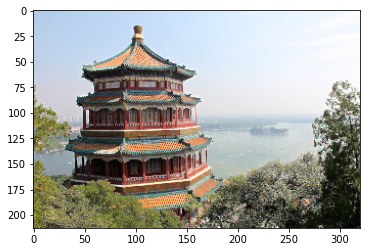

In [35]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

plt.imshow(output[0].astype(np.uint8))  # plot the output for the 1st image
plt.show()

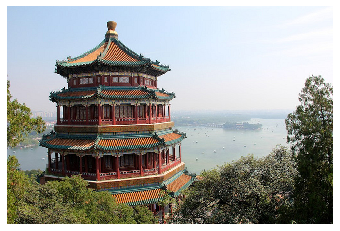

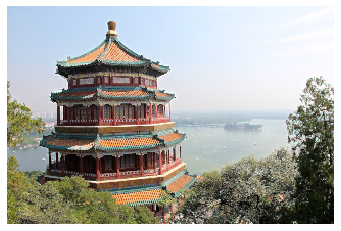

In [36]:
plot_color_image(dataset[0])
plt.show()
    
plot_color_image(output[0])
plt.show()

# Mnist

**Obs:** Em vez de usar as funções fully_connected(), conv2d() e dropout() do módulo tensorflow.contrib.layers (como no livro), agora usamos as funções dense(), conv2d() e dropout () (respectivamente) do módulo **tf.layers**, que não existia quando o capítulo foi escrito. Isso é preferível porque qualquer coisa em contrib pode ser alterado ou excluído sem aviso prévio, enquanto tf.layers faz parte da API oficial. 

Para todas essas funções:

o parâmetro de escopo foi renomeado para nome e o sufixo _fn foi removido em todos os parâmetros que o possuíam (por exemplo, o parâmetro activation_fn foi renomeado para ativação).

As outras diferenças principais em tf.layers.dense () são:

o parâmetro de pesos foi renomeado para kernel (e a variável de pesos agora é chamada de "kernel" em vez de "pesos"), a ativação padrão é Nenhum em vez de tf.nn.relu

As outras diferenças principais em tf.layers.conv2d () são:

o parâmetro num_outputs foi renomeado para filtros, o parâmetro stride foi renomeado para strides,
a ativação padrão agora é None em vez de tf.nn.relu.

As outras diferenças principais em tf.layers.dropout () são:

leva a taxa de abandono (dropout) (taxa) ao invés da probabilidade de manter (keep_prob). Obviamente, rate == 1 - keep_prob, os parâmetros is_training foram renomeados para training.

In [37]:
height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 10

#reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()


c:\users\ssag\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\legacy_tf_layers\core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '


**Obs:** tf.examples.tutorials.mnist está obsoleto. Em vez disso, usaremos tf.keras.datasets.mnist.

In [38]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [39]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [41]:
n_epochs = 10
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Last batch accuracy:", acc_batch, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_mnist_model")

0 Last batch accuracy: 0.98 Test accuracy: 0.9768
1 Last batch accuracy: 0.98 Test accuracy: 0.9837
2 Last batch accuracy: 0.98 Test accuracy: 0.9828
3 Last batch accuracy: 1.0 Test accuracy: 0.9872
4 Last batch accuracy: 1.0 Test accuracy: 0.9833
5 Last batch accuracy: 0.99 Test accuracy: 0.9884
6 Last batch accuracy: 1.0 Test accuracy: 0.9889
7 Last batch accuracy: 0.99 Test accuracy: 0.9889
8 Last batch accuracy: 0.99 Test accuracy: 0.9894
9 Last batch accuracy: 1.0 Test accuracy: 0.9889
